# Neural Network for classification
784 , 64 , 16 , 10

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\srikanth\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

###### Modified National Instuite of Science and technology

In [3]:
mnist = input_data.read_data_sets('./mnist_data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist_data\t10k-images-idx3-ubyte.gz
Extracting ./mnist_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
# mnist
# 70,000 images
# 55,000 training dataset
# 10,000 testing
# 5,000 validation

In [4]:
# training images
x_train= mnist.train.images
y_train= mnist.train.labels
# testing images
x_test= mnist.test.images
y_test= mnist.test.labels

In [6]:
x_train.shape

(55000, 784)

7

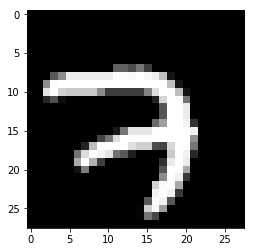

In [22]:
plt.figure(figsize=(4,4))
img = x_train[0:1]
img = img.reshape(28,28)
plt.imshow(img,cmap='gray')
y_train[0].argmax()

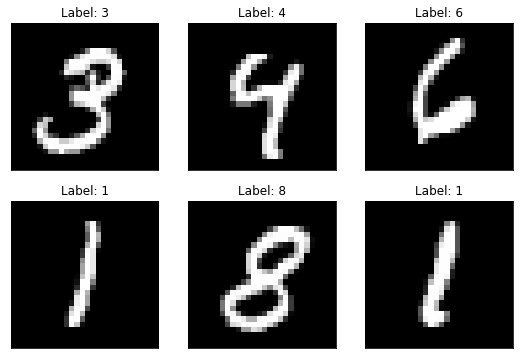

In [6]:
fig = plt.figure(figsize=(9,6))
for i in range(1,7):

    plt.subplot(2,3,i)
    plt.imshow(x_train[i:i+1].reshape((28,28)),cmap='gray')
    plt.title("Label: {}".format(y_train[i:i+1].argmax()))
    plt.xticks([]),plt.yticks([])
    
plt.show()

> ### FeedForward Neural network

In [7]:
with tf.name_scope('Input_Layer'):
    x_inputs = tf.placeholder(dtype=tf.float32,shape=[None,784],name='input')
with tf.name_scope('Weights'):
    # weights
    wx = tf.Variable(tf.truncated_normal(shape=(784,64)))
    wy = tf.Variable(tf.truncated_normal(shape=(64,16)))
    wz = tf.Variable(tf.truncated_normal(shape=(16,10)))
    # bais
    bx = tf.Variable(tf.truncated_normal(shape=[64])) 
    by = tf.Variable(tf.truncated_normal(shape=[16]))
    bz = tf.Variable(tf.truncated_normal(shape=[10]))
    
with tf.name_scope('Layer_1'):
    L1 = tf.matmul(x_inputs,wx,name='L1')
    L11 = tf.nn.sigmoid(L1+bx,name='Layer1')

with tf.name_scope('Layer_2'):
    L2 = tf.matmul(L11,wy,name='L2')
    L22 = tf.nn.sigmoid(L2+by,name='Layer2')
    
with tf.name_scope('output'):
    L3 = tf.matmul(L22,wz,name='L3')
    y = tf.nn.sigmoid(L3+bz,name='output') 

> ### Backward Pass

In [8]:
with tf.name_scope('loss'):
    y_actual = tf.placeholder(dtype=tf.float32,shape=[None,10],name='actual')
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
        labels=y_actual,logits=y))

In [9]:
with tf.name_scope('optimizer'):
    optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
    train = optimizer.minimize(cost)

In [10]:
cross_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_actual,1))
accuracy = tf.reduce_mean(tf.cast(cross_prediction,tf.float32))

# Training Model

In [11]:
epochs = 1001
batch_size = 10000

In [12]:
def batching(last,batch_size):
    return np.random.randint(low=0,high=last,size=batch_size)

In [ ]:
saver = tf.train.Saver()

In [ ]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter('./neural_class',graph=sess.graph)
    
    # training
    for i in range(epochs):
        ind = batching(55000,batch_size)
        sess.run(train,feed_dict={x_inputs:x_train[ind],
                                  y_actual:y_train[ind]})
        
        # check values for every 100 iterations
        if i%100 == 0:
            ind1 = batching(10000,batch_size)
            loss, acc = sess.run([cost,accuracy],feed_dict={x_inputs:x_test[ind1],
                                  y_actual:y_test[ind1]})
            
            print('Epoch: %d, Loss: %0.2f, Acc: %0.2f'%(i,loss,acc))
            
    
    saver.save(sess,'./numberclass_nn/nn.ckpt')
    writer.close()
        

Epoch: 0, Loss: 2.29, Acc: 0.10
Epoch: 100, Loss: 1.62, Acc: 0.90
Epoch: 200, Loss: 1.54, Acc: 0.93
Epoch: 300, Loss: 1.52, Acc: 0.94
Epoch: 400, Loss: 1.52, Acc: 0.95


# Testing

In [ ]:
import cv2

In [34]:
# Step - 1 : convert image into gray scale
img = cv2.imread('1887.jpg',0) # reading in grayscale
# step-2: inverse colors
img_not = cv2.bitwise_not(img)
# step-3: resize into 28 x 28 
img_resize = cv2.resize(img_not,(28,28))
# step-4: Normalization 0- 1
img_norm = img_resize/img_resize.max()
# step -3 : reshape into 1 x 784
test = img_norm.reshape((1,784))

In [35]:
test.shape

(1, 784)

### restore the model and testing it

In [36]:
with tf.Session() as sess:
    saver.restore(sess,'./numberclass_nn/nn.ckpt')
    result = sess.run(y,feed_dict={x_inputs:test})
    print(result)

INFO:tensorflow:Restoring parameters from ./numberclass_nn/nn.ckpt
[[1.8514884e-03 1.5807255e-04 9.9450374e-01 3.8597926e-01 1.7580111e-05
  5.9610064e-04 1.3753629e-04 4.1371284e-04 4.3767787e-04 8.8758306e-06]]


In [39]:
result.argmax()

2

In [23]:
784 , 64 , 16 , 10

(784, 64, 16, 10)

In [24]:
import keras

Using TensorFlow backend.


In [25]:
from keras import Sequential
from keras.layers import Dense

In [26]:
# Feed forward network
# 784 , 64 , 16 , 10
model = Sequential()
model.add(Dense(units=64,input_dim = 784,activation='sigmoid')) # layer-1
model.add(Dense(units=16,activation='sigmoid')) # layer-2
model.add(Dense(units=10,activation='softmax')) # output layer

In [27]:
# backward pass
model.compile(optimizer='adam',metrics=['accuracy'],
              loss='categorical_crossentropy')

In [28]:
# training 
model.fit(x=x_train,y=y_train,batch_size=100,epochs=10,
          validation_data=[x_test,y_test])

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 66us/step - loss: 1.2356 - acc: 0.7622 - val_loss: 0.6326 - val_acc: 0.8847
Epoch 2/10
55000/55000 [==============================] - 2s 33us/step - loss: 0.4728 - acc: 0.8999 - val_loss: 0.3580 - val_acc: 0.9174
Epoch 3/10
55000/55000 [==============================] - 2s 33us/step - loss: 0.3118 - acc: 0.9240 - val_loss: 0.2688 - val_acc: 0.9337
Epoch 4/10
55000/55000 [==============================] - 2s 33us/step - loss: 0.2443 - acc: 0.9374 - val_loss: 0.2253 - val_acc: 0.9411
Epoch 5/10
55000/55000 [==============================] - 2s 33us/step - loss: 0.2031 - acc: 0.9465 - val_loss: 0.1944 - val_acc: 0.9471
Epoch 6/10
55000/55000 [==============================] - 2s 34us/step - loss: 0.1736 - acc: 0.9535 - val_loss: 0.1743 - val_acc: 0.9511
Epoch 7/10
55000/55000 [==============================] - 2s 38us/step - loss: 0.1511 - acc: 0.9592 - val_loss: 0.1552 - val_acc

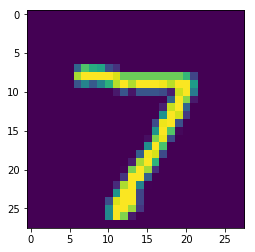

In [29]:
plt.imshow(x_test[0:1].reshape(28,28))

In [31]:
result = model.predict(x_test[0:1])

In [33]:
result.argmax()

7